# Logistic Regression

Logistic regression is commonly used for binary classification.
First, let us prepare a dataset that has only 2 classes as its labels.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

We can load the readily available IRIS dataset from scikit-learn which has 3 classes.
We will then remove 1 of the 3 classes to suit our needs.

In [2]:
iris = datasets.load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
np.unique(iris.target)

array([0, 1, 2])

Remove the data entries with label 2.

In [8]:
idx = iris.target != 2

In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(idx)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [11]:
data = iris.data[idx].astype(np.float32)
target=iris.target[idx].astype(np.float32)

The target has only 2 classes, 0 or 1

In [12]:
print(target)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


If you plot out all the new datapoints which consists of 2 classes, you can see that the dataset can be well separated linearly.

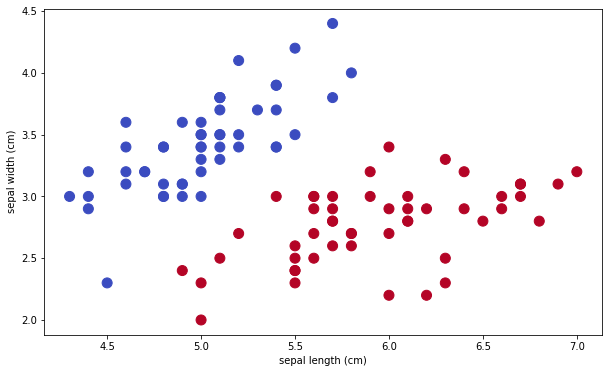

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.coolwarm, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

In [15]:
X_train.shape, y_train.shape

((70, 4), (70,))

In [16]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")

In [18]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictions=model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[15  0]
 [ 0 15]]


# Binary Classification of Breast Cancer dataset

In [22]:
bcancer = datasets.load_breast_cancer()

In [23]:
dir(bcancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [24]:
bcancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [25]:
bcancer.data.shape,bcancer.target.shape

((569, 30), (569,))

In [26]:
data = bcancer.data.astype(np.float32)
target = bcancer.target.astype(np.float32)

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")

model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 66   2]
 [  1 102]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        68
         1.0       0.98      0.99      0.99       103

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

